## Module 5 - Linear and Multiple Regression exercises

Linear regression is one of the important modelling techniques. We looked into some of the important concepts like fitting a linear model, how variation in the data is explained by the model, error of the estimates, multiple and multivariate regression. 

We will apply the knowledge gained in lab and practice notebooks on a new dataset about concrete. The dataset source opinions, concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. We will fit a simple linear model for the response variable concrete compressive strength and extend it to multiple predictors to analyze and evaluate any improvement in the model.

Reading the data from dataset located at /datasets/concrete/Concrete_Data.csv

In [1]:
concrete_data = read.csv("../../../datasets/concrete/Concrete_Data.csv",header=TRUE)
head(concrete_data)

Cement..component.1..kg.in.a.m.3.mixture.,Blast.Furnace.Slag..component.2..kg.in.a.m.3.mixture.,Fly.Ash..component.3..kg.in.a.m.3.mixture.,Water...component.4..kg.in.a.m.3.mixture.,Superplasticizer..component.5..kg.in.a.m.3.mixture.,Coarse.Aggregate...component.6..kg.in.a.m.3.mixture.,Fine.Aggregate..component.7..kg.in.a.m.3.mixture.,Age..day.,Concrete.compressive.strength.MPa..megapascals..
540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
266.0,114.0,0,228,0.0,932.0,670.0,90,47.03


The column headers are not very aesthetic or readable. 

**Activity 1: **Modify the column names so that only the actual name of the column is used instead of all the unwanted description. 

The column names are present in a file called headers.txt in the directory /DSA-8610/datasets/concrete/. Read the data and extract the names into an array called headers.

In [4]:
headers = c('Cement','Blast','Fly','Water','Superplasticizer','Coarse','Fine','Age','Concrete')

In [3]:
names(concrete_data)=headers
summary(concrete_data)

     Cement          Blast            Fly             Water      
 Min.   :102.0   Min.   :  0.0   Min.   :  0.00   Min.   :121.8  
 1st Qu.:192.4   1st Qu.:  0.0   1st Qu.:  0.00   1st Qu.:164.9  
 Median :272.9   Median : 22.0   Median :  0.00   Median :185.0  
 Mean   :281.2   Mean   : 73.9   Mean   : 54.19   Mean   :181.6  
 3rd Qu.:350.0   3rd Qu.:142.9   3rd Qu.:118.30   3rd Qu.:192.0  
 Max.   :540.0   Max.   :359.4   Max.   :200.10   Max.   :247.0  
 Superplasticizer     Coarse            Fine            Age        
 Min.   : 0.000   Min.   : 801.0   Min.   :594.0   Min.   :  1.00  
 1st Qu.: 0.000   1st Qu.: 932.0   1st Qu.:731.0   1st Qu.:  7.00  
 Median : 6.400   Median : 968.0   Median :779.5   Median : 28.00  
 Mean   : 6.205   Mean   : 972.9   Mean   :773.6   Mean   : 45.66  
 3rd Qu.:10.200   3rd Qu.:1029.4   3rd Qu.:824.0   3rd Qu.: 56.00  
 Max.   :32.200   Max.   :1145.0   Max.   :992.6   Max.   :365.00  
    Concrete    
 Min.   : 2.33  
 1st Qu.:23.71  
 Median :34

**Activity 2: ** Split the data into training and testing sets. Put 70% of data in "train_data" dataframe and rest in "test_data" dataframe. Use the seed as 1000 to reproduce test results for evaluation. 

We will evaluate the predictive capability of our model on test dataset. 

In [12]:
library(caTools)
set.seed(1000)
split = sample.split(concrete_data$Concrete, SplitRatio=0.7) 
train_data  = subset(concrete_data, split == TRUE)
test_data  = subset(concrete_data, split == FALSE)

Check the correlation of independent variables with dependent variable Concrete. 

In [13]:
cor(train_data)

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Concrete
Cement,1.00000000,-0.26450684,-0.404872562,-0.09100654,0.1056472,-0.125184235,-0.20881391,0.06162377,0.5113358
Blast,-0.26450684,1.00000000,-0.332889393,0.12028319,0.0442492,-0.294079870,-0.29749125,-0.05270709,0.1044302
Fly,-0.40487256,-0.33288939,1.000000000,-0.27390833,0.3770744,0.003019973,0.09064543,-0.14991558,-0.1140063
Water,-0.09100654,0.12028319,-0.273908331,1.00000000,-0.6376211,-0.178689670,-0.44383214,0.29158177,-0.2678382
Superplasticizer,0.10564721,0.04424920,0.377074412,-0.63762114,1.0000000,-0.276017172,0.18869564,-0.20726499,0.3465863
Coarse,-0.12518424,-0.29407987,0.003019973,-0.17868967,-0.2760172,1.000000000,-0.16567141,0.01356077,-0.1739224
Fine,-0.20881391,-0.29749125,0.090645433,-0.44383214,0.1886956,-0.165671411,1.00000000,-0.13718906,-0.1528466
Age,0.06162377,-0.05270709,-0.149915576,0.29158177,-0.2072650,0.013560773,-0.13718906,1.00000000,0.3260410
Concrete,0.51133578,0.10443017,-0.114006273,-0.26783820,0.3465863,-0.173922425,-0.15284656,0.32604104,1.0000000


cement is highly correlated with concrete with a correlation of 0.51. 

**Activity 3: ** Fit a simple regression model to predict Concrete using Cement variable. Name this model "concrete_cement_reg". Use train_data as datasource.

In [19]:
concrete_cement_reg=lm(Concrete ~ Cement, data=concrete_data)

**Activity 4: ** Plot the regression line and residual errors for above model as shown in linear and multiple regression lab. 


Call:
lm(formula = Concrete ~ Cement, data = concrete_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.593 -10.952  -0.569   9.990  43.240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.442528   1.296948   10.37   <2e-16 ***
Cement       0.079580   0.004324   18.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.5 on 1028 degrees of freedom
Multiple R-squared:  0.2478,	Adjusted R-squared:  0.2471 
F-statistic: 338.7 on 1 and 1028 DF,  p-value: < 2.2e-16


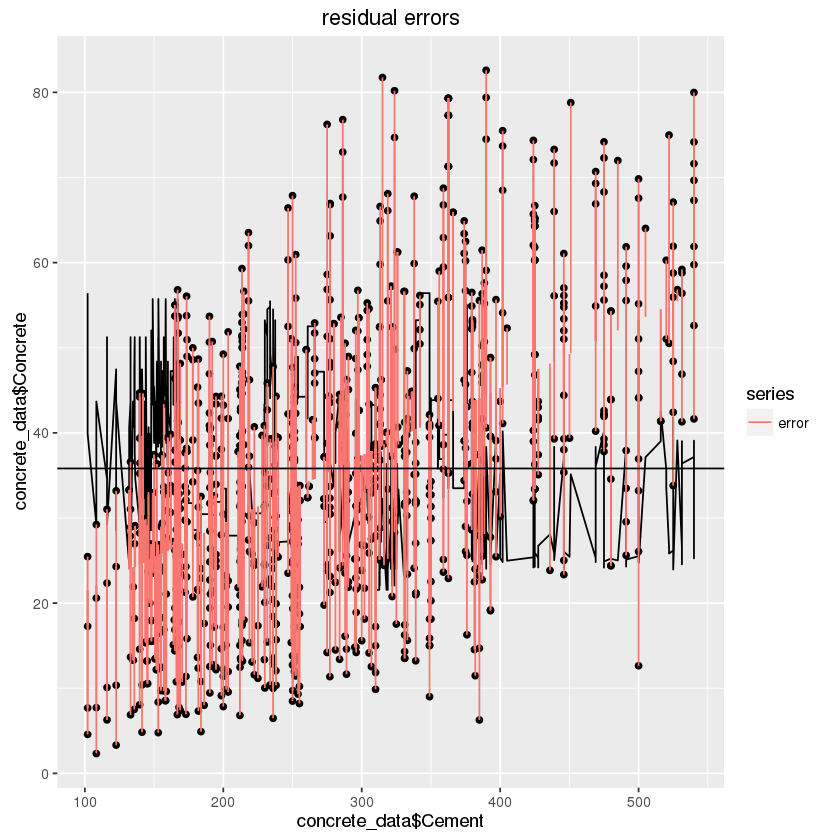

In [24]:
library(ggplot2)
pred_values=concrete_cement_reg$fitted.values
diff = concrete_data$Concrete-pred_values  
summary(concrete_cement_reg)
#plot the regression line and residual errors
qplot(x=concrete_data$Cement, y=concrete_data$Concrete)+
        geom_line(y=pred_values)+
        geom_segment(aes(x=concrete_data$Cement, xend=concrete_data$Cement, y=concrete_data$Concrete, yend=pred_values, color="error"))+ 
        geom_hline(aes(yintercept=mean(concrete_data$Concrete))) +
        labs(title="residual errors", color="series")

According to the R-squared value the variable Cement can only explain 26% of the variation in the data. Add next highly correlated variable to the model. Name this new model as  concrete_reg1

**Activity 5: ** Calculate Sum of squared errors of above model where SSE = square of residual terms. You can access residuals vy accessing model like concrete_cement_reg$residuals.
 

In [27]:
SSE = sum(concrete_cement_reg$residuals^2)
print(SSE)

[1] 216002.7


We have seen Cement was a significant variable in predicting Concrete strength. Its the most correlated variable with Concrete. So we can confidently say no other variable in the dataset wil have better results in predicting Concrete strength if one variable linear regression mdoels are built. Move on to multiple regression and add more variables to the mdoel. We will keep adding variables until there is no significant increase in the R-squared value.

**Activity 6: ** Add Superplasticizer along with Cement to the simple regression model fitted above and predict Concrete. Name this model "concrete_reg1". Use train_data as datasource.

In [29]:
concrete_reg1=lm(Concrete ~ Cement+Superplasticizer, data=concrete_data)
summary(concrete_reg1)


Call:
lm(formula = Concrete ~ Cement + Superplasticizer, data = concrete_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.948 -10.030  -0.507   9.119  43.676 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.181389   1.250360   7.343 4.25e-13 ***
Cement           0.074813   0.004035  18.540  < 2e-16 ***
Superplasticizer 0.902821   0.070592  12.789  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.47 on 1027 degrees of freedom
Multiple R-squared:  0.3512,	Adjusted R-squared:  0.3499 
F-statistic: 277.9 on 2 and 1027 DF,  p-value: < 2.2e-16


Superplasticizer has added value to the model. R-squared value increased from 0.25 to 0.35. Add next highly correlated variable Age to the model and call this model concrete_reg2.

**Activity 7: ** Add Age variable to concrete_reg1 model fitted above to predict Concrete. Name this model "concrete_reg2". Check for any improvement in the R-squared value. 

In [31]:
concrete_reg2=lm(Concrete ~ Cement+Superplasticizer+Age, data=concrete_data)
summary(concrete_reg2)


Call:
lm(formula = Concrete ~ Cement + Superplasticizer + Age, data = concrete_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.280  -8.073  -0.542   7.544  45.670 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.087529   1.146649   4.437 1.01e-05 ***
Cement           0.068859   0.003627  18.985  < 2e-16 ***
Superplasticizer 1.111935   0.064446  17.254  < 2e-16 ***
Age              0.097901   0.006089  16.078  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.04 on 1026 degrees of freedom
Multiple R-squared:  0.4818,	Adjusted R-squared:  0.4802 
F-statistic: 317.9 on 3 and 1026 DF,  p-value: < 2.2e-16


The model is getting better with addition of new predictors. The latest model concrete_reg2 can explain more variation in the data. If we keep on adding the data at some point there would be an insignificant increase in the model R-squared value. Its better to exclude variables to avoid over fitting of models. The variables Coarse, Fine, Fly don't contribute much to the model to the model built with  Cement+Superplasticizer+Age+Blast+Water as predictos. 

We had to check each variable if it was adding any new information to the model. This can become time consuming when they are few 10's of variables in the model. Instead you can reverse engineer and build a model using all the independent variables and start selecting the variables which are singificant or exclude variables which are insignificant which ever works the best in a situation.  

**Activity 8: ** Fit a multiple regression model using all the independent variables in concrete_data dataset to predict Concerte. Name this model concrete_reg3.

In [32]:
concrete_reg3=lm(Concrete ~ ., data=concrete_data)
summary(concrete_reg3)


Call:
lm(formula = Concrete ~ ., data = concrete_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.654  -6.302   0.703   6.569  34.450 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -23.331214  26.585504  -0.878 0.380372    
Cement             0.119804   0.008489  14.113  < 2e-16 ***
Blast              0.103866   0.010136  10.247  < 2e-16 ***
Fly                0.087934   0.012583   6.988 5.02e-12 ***
Water             -0.149918   0.040177  -3.731 0.000201 ***
Superplasticizer   0.292225   0.093424   3.128 0.001810 ** 
Coarse             0.018086   0.009392   1.926 0.054425 .  
Fine               0.020190   0.010702   1.887 0.059491 .  
Age                0.114222   0.005427  21.046  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.4 on 1021 degrees of freedom
Multiple R-squared:  0.6155,	Adjusted R-squared:  0.6125 
F-statistic: 204.3 on 8 and 1021 DF,  p-value: < 2.2

**Activity 9: ** According to the summary of the model concrete_reg3 above remove the variables with p-value greater than 0.05 and from the model and rebuild the model with the rest variables. Name this model concrete_reg4.

In [33]:
concrete_reg4=lm(Concrete ~ Cement+Superplasticizer+Age+Blast+Water, data=concrete_data)
summary(concrete_reg4)


Call:
lm(formula = Concrete ~ Cement + Superplasticizer + Age + Blast + 
    Water, data = concrete_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.428  -7.712   0.459   7.054  34.306 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      35.448354   4.304715   8.235 5.44e-16 ***
Cement            0.081303   0.003386  24.014  < 2e-16 ***
Superplasticizer  0.614761   0.076027   8.086 1.73e-15 ***
Age               0.109259   0.005587  19.555  < 2e-16 ***
Blast             0.060132   0.004141  14.523  < 2e-16 ***
Water            -0.196826   0.021776  -9.039  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.8 on 1024 degrees of freedom
Multiple R-squared:  0.5843,	Adjusted R-squared:  0.5823 
F-statistic: 287.9 on 5 and 1024 DF,  p-value: < 2.2e-16


The R-squared value of above model concrete_reg4 is 0.59. This is the best model you can get without applying any more advanced techniques. You came to this point in two steps doing reverse engineering eliminating variables from the model. Above approach of including predictors one by one and checking R-squared value will make build eight different models adding eight variables to model one by one. So this second approach is the better one. This may not be the case in all situations but its a better approach when your data has amny predictos. 